# **Data preprocessing**

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sys import path
path.append('../../heartview/')
from heartview.pipeline import ECG
from scipy.fft import fft, fftfreq

## **Load and check data**

In [126]:
data_dir = '../data/raw/'
output_dir = '../data/preprocessed/'
fs_ecg = 1024
fs_eda = 4
condition = 'neutral'
person = 'VM'
session = 'VM'

# Read data
#df_ecg = pd.read_csv(data_dir + f'{session}_{condition}_Session1_ECG_{person}_Calibrated_SD.csv', skiprows=1)
#df_eda = pd.read_csv(data_dir + f'{session}_{condition}_Session1_EDA_{person}_Calibrated_SD.csv', skiprows=1)
df_ecg = pd.read_csv(data_dir + f'{session}_Session1_ECG_{person}_Calibrated_SD.csv', skiprows=1)
df_eda = pd.read_csv(data_dir + f'{session}_Session1_EDA_{person}_Calibrated_SD.csv', skiprows=1)
#df_eda = pd.read_csv(data_dir + 'YW_test_Session4_EDA_NN_gel.csv', skiprows=1)
# output_filename_ecg = f'{session}_{condition}_ECG_{person}_preprocessed.csv'
output_filename_ecg = f'{session}_ECG_{person}_preprocessed.csv'

/var/folders/1x/tmzcjdgn7wqdrcsl41btp5vh0000gn/T/ipykernel_4105/469770882.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ecg = pd.read_csv(data_dir + f'{session}_Session1_ECG_{person}_Calibrated_SD.csv', skiprows=1)


In [127]:
df_ecg

,ECG_VM_Timestamp_Unix_CAL,ECG_VM_Accel_LN_X_CAL,ECG_VM_Accel_LN_Y_CAL,ECG_VM_Accel_LN_Z_CAL,ECG_VM_ECG_EMG_Status1_CAL,ECG_VM_ECG_EMG_Status2_CAL,ECG_VM_ECG_LA-RA_24BIT_CAL,ECG_VM_ECG_LL-LA_24BIT_CAL,ECG_VM_ECG_LL-RA_24BIT_CAL,ECG_VM_ECG_Vx-RL_24BIT_CAL,ECG_VM_Pressure_BMP180_CAL,ECG_VM_Temperature_BMP180_CAL,Unnamed: 12
0,ms,m/(s^2),m/(s^2),m/(s^2),no_units,no_units,mV,mV,mV,mV,kPa,Degrees Celsius,NaN
1,1.7325597559153442E12,-1.5421686746987953,-1.8192771084337351,10.373493975903616,128.0,128.0,164.1203390503334,-769.1204111719622,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512,NaN
2,1.7325597559729614E12,-2.951807228915663,-1.2409638554216869,9.012048192771084,128.0,128.0,164.2299639260726,-769.2300360477014,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512,NaN
3,1.732559755973938E12,-1.5180722891566265,-1.9759036144578315,10.361445783132531,128.0,128.0,164.22780027720933,-769.2278723988381,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512,NaN
4,1.7325597559749146E12,-1.4819277108433735,-2.024096385542169,10.373493975903616,128.0,128.0,164.23609426451856,-769.2361663861474,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628439,1732562327110.656738,2.879518,-1.277108,10.457831,128.0,128.0,605.0,-782.510801,-177.510801,-605.000072,100.838385,35.684722,NaN
2628440,1732562327111.633301,2.855422,-1.13253,10.481928,128.0,128.0,605.0,-782.358264,-177.358264,-605.000072,100.838385,35.684722,NaN
2628441,1732562327112.610107,2.722892,-1.012048,10.445783,128.0,128.0,605.0,-782.273521,-177.273521,-605.000072,100.838385,35.684722,NaN
2628442,1732562327113.586426,2.662651,-0.903614,10.46988,128.0,128.0,605.0,-782.585087,-177.585087,-605.000072,100.838385,35.684722,NaN


In [128]:
# Remove unnecessary columns
unnamed_cols_ecg = [col for col in df_ecg.columns if col.startswith('Unnamed')]
unnamed_cols_eda = [col for col in df_eda.columns if col.startswith('Unnamed')]
print(unnamed_cols_ecg, unnamed_cols_eda)

['Unnamed: 12'] ['Unnamed: 10']


In [129]:
# Rename columns
df_ecg = df_ecg.iloc[1:, :].drop(columns=unnamed_cols_ecg).reset_index(drop=True).rename(columns={
        f'ECG_{person}_Timestamp_Unix_CAL': 'timestamp', 
        f'ECG_{person}_Accel_LN_X_CAL': 'acc_x',
        f'ECG_{person}_Accel_LN_Y_CAL': 'acc_y',
        f'ECG_{person}_Accel_LN_Z_CAL': 'acc_z',
        f'ECG_{person}_ECG_EMG_Status1_CAL': 'ecg_emg_status1',
        f'ECG_{person}_ECG_EMG_Status2_CAL': 'ecg_emg_status2',
        f'ECG_{person}_ECG_LA-RA_24BIT_CAL': 'ecg_la_ra', 
        f'ECG_{person}_ECG_LL-LA_24BIT_CAL': 'ecg_ll_la', 
        f'ECG_{person}_ECG_LL-RA_24BIT_CAL': 'ecg_ll_ra',
        f'ECG_{person}_ECG_Vx-RL_24BIT_CAL': 'ecg_vx_rl',
        f'ECG_{person}_Gyro_X_CAL': 'gyro_x',
        f'ECG_{person}_Gyro_Y_CAL': 'gyro_y',
        f'ECG_{person}_Gyro_Z_CAL': 'gyro_z',
        f'ECG_{person}_Pressure_BMP180_CAL': 'pressure',
        f'ECG_{person}_Temperature_BMP180_CAL': 'temperature'
    })
df_ecg

,timestamp,acc_x,acc_y,acc_z,ecg_emg_status1,ecg_emg_status2,ecg_la_ra,ecg_ll_la,ecg_ll_ra,ecg_vx_rl,pressure,temperature
0,1.7325597559153442E12,-1.5421686746987953,-1.8192771084337351,10.373493975903616,128.0,128.0,164.1203390503334,-769.1204111719622,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512
1,1.7325597559729614E12,-2.951807228915663,-1.2409638554216869,9.012048192771084,128.0,128.0,164.2299639260726,-769.2300360477014,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512
2,1.732559755973938E12,-1.5180722891566265,-1.9759036144578315,10.361445783132531,128.0,128.0,164.22780027720933,-769.2278723988381,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512
3,1.7325597559749146E12,-1.4819277108433735,-2.024096385542169,10.373493975903616,128.0,128.0,164.23609426451856,-769.2361663861474,-605.0000721216288,-605.0000721216288,100.8017439620958,26.6933324074512
4,1.732559755975891E12,-1.4819277108433735,-2.024096385542169,10.421686746987952,128.0,128.0,164.23609426451856,-769.2361663861474,-605.0000721216288,-605.0000721216288,100.80028684732889,26.6933324074512
...,...,...,...,...,...,...,...,...,...,...,...,...
2628438,1732562327110.656738,2.879518,-1.277108,10.457831,128.0,128.0,605.0,-782.510801,-177.510801,-605.000072,100.838385,35.684722
2628439,1732562327111.633301,2.855422,-1.13253,10.481928,128.0,128.0,605.0,-782.358264,-177.358264,-605.000072,100.838385,35.684722
2628440,1732562327112.610107,2.722892,-1.012048,10.445783,128.0,128.0,605.0,-782.273521,-177.273521,-605.000072,100.838385,35.684722
2628441,1732562327113.586426,2.662651,-0.903614,10.46988,128.0,128.0,605.0,-782.585087,-177.585087,-605.000072,100.838385,35.684722


In [130]:
# Rename columns
df_eda = df_eda.iloc[1:, :].drop(columns=unnamed_cols_eda).reset_index(drop=True).rename(columns={
        f'EDA_{person}_Timestamp_Unix_CAL': 'timestamp', 
        f'EDA_{person}_Accel_LN_X_CAL': 'acc_x',
        f'EDA_{person}_Accel_LN_Y_CAL': 'acc_y',
        f'EDA_{person}_Accel_LN_Z_CAL': 'acc_z',
        f'EDA_{person}_GSR_Range_CAL': 'gsr_range',
        f'EDA_{person}_GSR_Skin_Conductance_CAL': 'gsr_skin_conductance',
        f'EDA_{person}_GSR_Skin_Resistance_CAL': 'gsr_skin_resistance',
        f'EDA_{person}_Gyro_X_CAL': 'gyro_x',
        f'EDA_{person}_Gyro_Y_CAL': 'gyro_y',
        f'EDA_{person}_Gyro_Z_CAL': 'gyro_z',
        f'EDA_{person}_PPG_A13_CAL': 'ppg',
        f'EDA_{person}_Pressure_BMP180_CAL': 'pressure',
        f'EDA_{person}_Temperature_BMP180_CAL': 'temperature'
    })
df_eda

,timestamp,acc_x,acc_y,acc_z,gsr_range,gsr_skin_conductance,gsr_skin_resistance,ppg,pressure,temperature
0,1.7325597802480164E12,0.3855421686746988,1.7831325301204821,9.650602409638555,2.0,3.527472527472528,283.4890965732087,1694.5054945054944,100.58324699564156,26.971951891818172
1,1.7325597804980164E12,0.45783132530120485,1.566265060240964,9.55421686746988,2.0,3.527472527472528,283.4890965732087,1513.5531135531135,100.58496006457439,26.977991611709438
2,1.7325597807480164E12,0.24096385542168675,1.674698795180723,9.698795180722891,2.0,3.527472527472528,283.4890965732087,1412.4542124542124,100.58643458915721,26.977991611709438
3,1.7325597809980164E12,0.46987951807228917,1.4819277108433735,9.72289156626506,2.0,3.527472527472528,283.4890965732087,1359.7069597069597,100.58472150069998,26.971951891818172
4,1.7325597812480164E12,0.39759036144578314,1.710843373493976,10.132530120481928,2.0,3.527472527472528,283.4890965732087,1287.179487179487,100.58472150069998,26.971951891818172
...,...,...,...,...,...,...,...,...,...,...
10203,1.7325623309980164E12,0.49397590361445787,0.9397590361445783,9.614457831325302,1.0,9.937333282281017,100.63061905985101,1361.904761904762,100.61689711150775,35.67989772582463
10204,1.7325623312480164E12,2.313253012048193,-1.036144578313253,9.204819277108435,1.0,9.88117573483427,101.20253164556962,1257.142857142857,100.61990175414736,35.67989772582463
10205,1.7325623314980164E12,3.2289156626506026,0.13253012048192772,7.9397590361445785,1.0,9.81991295580146,101.83389654276058,1364.8351648351647,100.61828744172844,35.674108172620876
10206,1.7325623317480164E12,3.240963855421687,1.313253012048193,8.819277108433736,1.0,9.768860639940778,102.36608309380716,1311.3553113553112,100.61678513899525,35.674108172620876


In [230]:
#df_eda = df_eda.rename(columns={f'EDA_{person}_TimestampSync_Unix_CAL': 'timestamp'})

In [131]:
# Convert to datetime
df_ecg = df_ecg.astype({col: float for col in df_ecg.columns if col != 'timestamp'})
try:
    df_ecg['timestamp'] = pd.to_datetime(df_ecg['timestamp'].astype(float), unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/New_York')
except ValueError:
    df_ecg['timestamp'] = pd.to_datetime(df_ecg['timestamp'])

df_eda = df_eda.astype(float)
df_eda['timestamp'] = pd.to_datetime(df_eda['timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/New_York')

In [232]:
# df_eda = df_eda.astype(float)
# df_eda['timestamp'] = pd.to_datetime(df_eda['timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/New_York')

Text(0, 0.5, 'mV')

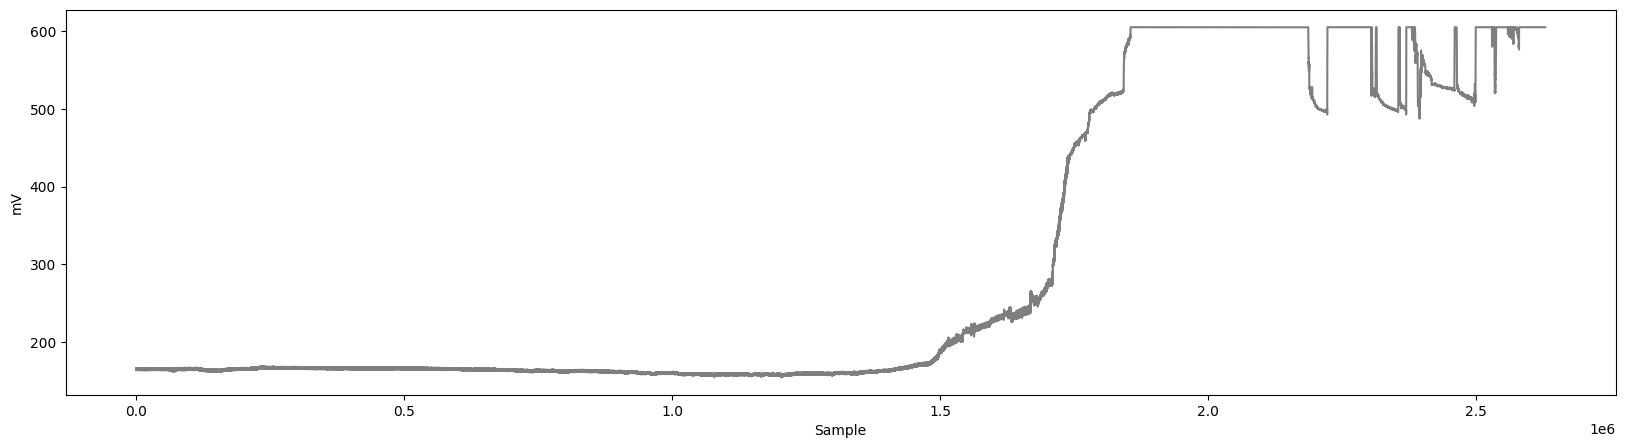

In [190]:
# Check data quality
df_ecg['ecg_la_ra'].iloc[0:].plot(figsize=(20, 5), color='C7')
plt.xlabel('Sample')
plt.ylabel('mV')

Text(0, 0.5, 'uS')

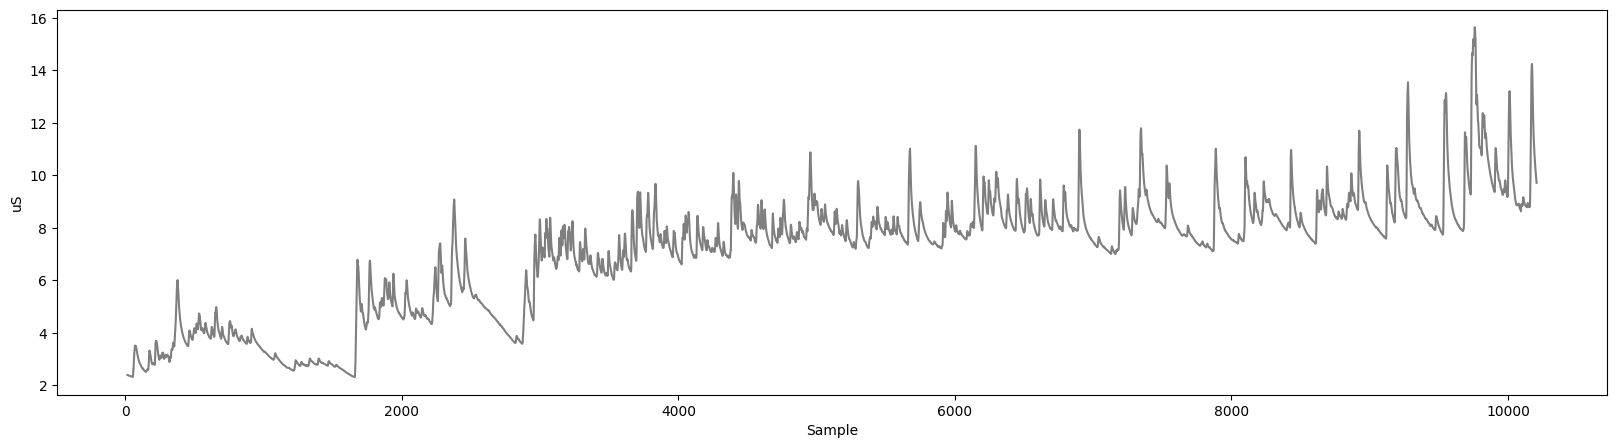

In [184]:
# Check data quality
df_eda['gsr_skin_conductance'].iloc[15:].plot(figsize=(20, 5), color='C7')
plt.xlabel('Sample')
plt.ylabel('uS')

In [19]:
# Re-sample to reduce sampling frequency
# df_eda_resampled = df_eda[::16].reset_index(drop=True)
# df_eda_resampled

,timestamp,acc_x,acc_y,acc_z,gsr_range,gsr_skin_conductance,gsr_skin_resistance,ppg,pressure,temperature
0,2024-10-27 17:55:39.901580811-04:00,-0.204819,-2.939759,9.120482,3.0,0.000222,4.504500e+06,1150.915751,102.361741,23.703068
1,2024-10-27 17:55:40.151580811-04:00,0.000000,-2.927711,9.421687,2.0,0.034432,2.904255e+04,1323.809524,102.355947,23.703068
2,2024-10-27 17:55:40.401580811-04:00,-0.289157,-2.542169,9.662651,3.0,0.035742,2.797826e+04,1295.238095,102.342910,23.703068
3,2024-10-27 17:55:40.651580811-04:00,-0.373494,-2.626506,9.638554,3.0,0.035742,2.797826e+04,1295.970696,102.347255,23.703068
4,2024-10-27 17:55:40.901580811-04:00,-0.337349,-2.614458,9.650602,3.0,0.035742,2.797826e+04,1293.040293,102.372885,23.801381
...,...,...,...,...,...,...,...,...,...,...
2919,2024-10-27 18:07:49.651580811-04:00,-2.168675,-5.397590,7.722892,3.0,0.103230,9.687097e+03,1394.871795,102.389304,26.761072
2920,2024-10-27 18:07:49.901580811-04:00,-2.084337,-5.373494,7.578313,3.0,0.103230,9.687097e+03,1129.670330,102.392790,26.773150
2921,2024-10-27 18:07:50.151580811-04:00,-1.975904,-5.397590,6.987952,3.0,0.103230,9.687097e+03,1265.934066,102.391332,26.773150
2922,2024-10-27 18:07:50.401580811-04:00,-3.240964,-4.831325,7.337349,3.0,0.103230,9.687097e+03,1213.186813,102.388415,26.773150


## **Smoothen the signals**

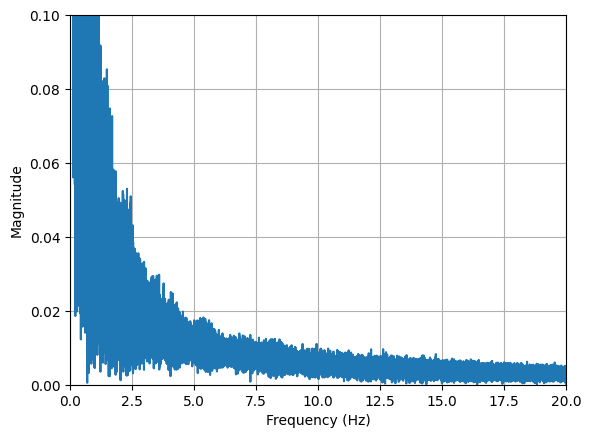

In [185]:
# Check frequency bands
N = len(df_ecg['ecg_la_ra'])
T = 1.0 / fs_ecg
# sample spacing
yf = fft(df_ecg['ecg_la_ra'])
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 20])
plt.ylim([0, 0.1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

Text(0, 0.5, 'mV')

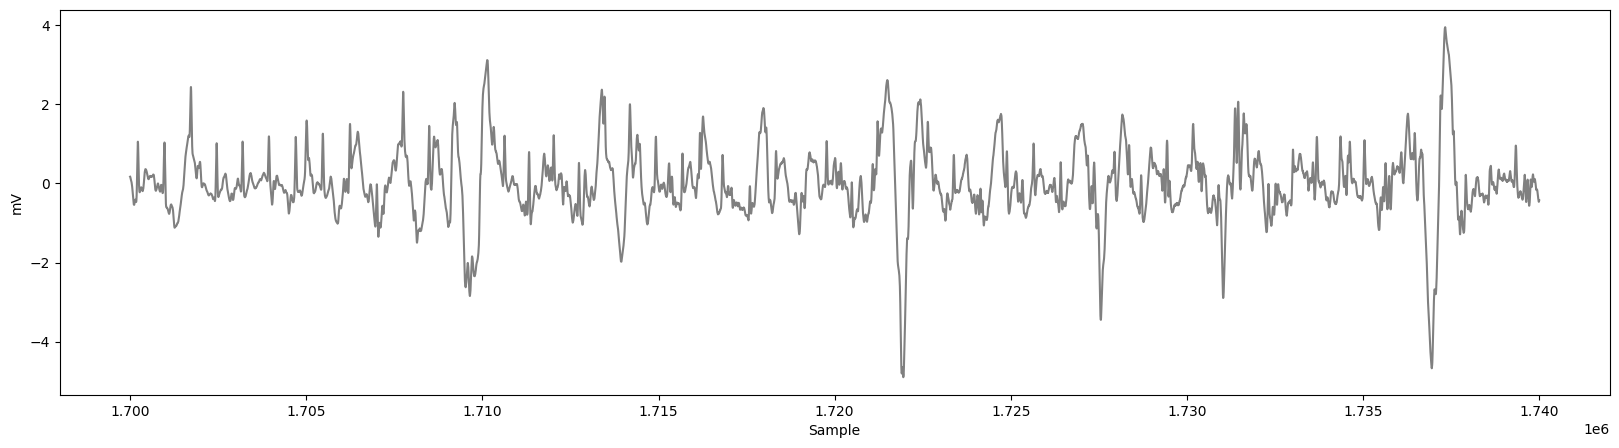

In [194]:
# Filter the ECG signal
Filter = ECG.Filters(fs=fs_ecg)
df_ecg['ecg_filtered'] = Filter.filter_signal(df_ecg['ecg_la_ra'], lowcut=1, highcut=10)
df_ecg['ecg_filtered'].iloc[1700000:1740000].plot(figsize=(20, 5), color='gray')
plt.xlabel('Sample')
plt.ylabel('mV')

In [197]:
# Detect R-peaks
BeatDetector = ECG.BeatDetectors(fs=fs_ecg, preprocessed=True)
ecg_beats = BeatDetector.manikandan(signal=df_ecg['ecg_filtered'], adaptive_threshold=True)
df_ecg['peak'] = 0
df_ecg.loc[ecg_beats, 'peak'] = 1

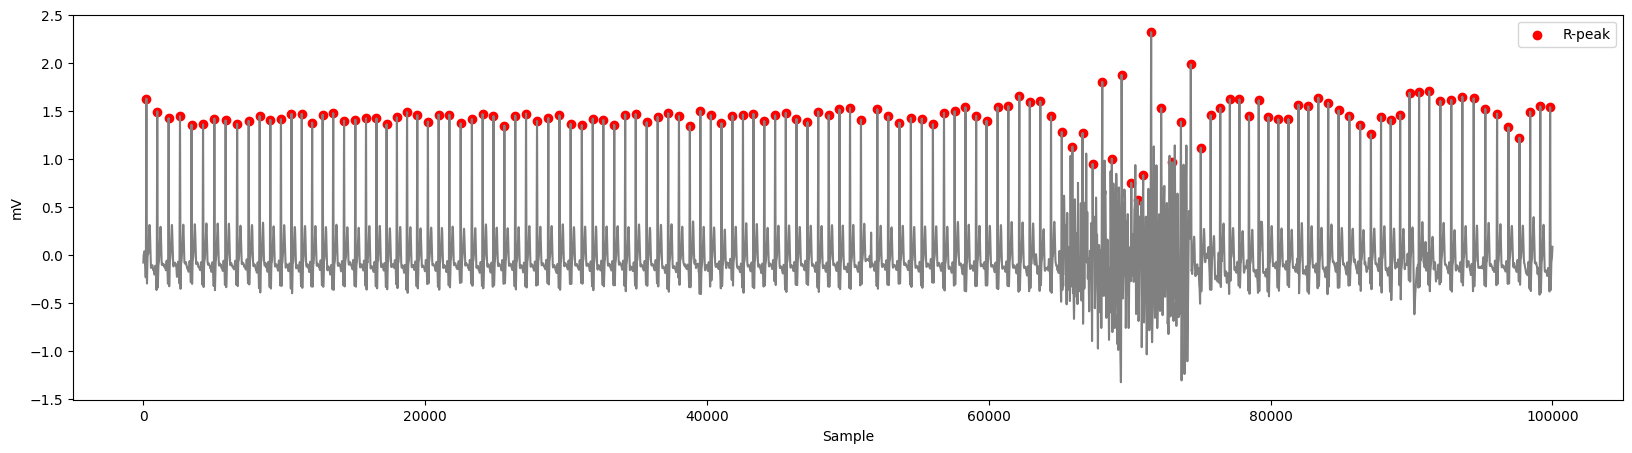

In [198]:
# Check the detected R-peaks
fig, ax = plt.subplots(figsize=(20, 5))
df_plot = df_ecg.iloc[0:100000]
ax.plot(df_plot['ecg_filtered'], color='gray')
ax.scatter(df_plot[df_plot['peak'] == 1].index, df_plot[df_plot['peak'] == 1]['ecg_filtered'], color='red', label='R-peak')
plt.xlabel('Sample')
plt.ylabel('mV')
plt.legend()

In [199]:
df_ecg = df_ecg[:1740000]

In [200]:
df_ecg = df_ecg[['timestamp', 'ecg_filtered', 'peak', 'acc_x', 'acc_y', 'acc_z', 'temperature']]
df_ecg.to_csv(output_dir + output_filename_ecg, index=False)